# Introduction

Prediction with using a few of Supervised Learning Classification Methods on Fish Data

<font color ='red'>
Content :
    
    
    
1.[  Load and Check Data](#1)

2.[ Viusalizing Data](#2)    
    
3.[ K-Nearest Neighbour (KNN) Classification](#3)   
    
4.[ Logistic Regression Classification](#4)   
    
5.[ Naive Bayes Classification](#5)
    
6.[ Random Forest Classification](#6) 
    
7.[ Result](#7)    


In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fish-market/Fish.csv


<a id = "1"></a>
<font color ='red'>
## 1. Load and Check Data

In [2]:
data = pd.read_csv("/kaggle/input/fish-market/Fish.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
x = data.isnull().sum().sum()
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [4]:
species_list = data.Species
Counter(species_list)

Counter({'Bream': 35,
         'Roach': 20,
         'Whitefish': 6,
         'Parkki': 11,
         'Perch': 56,
         'Pike': 17,
         'Smelt': 14})

<a id = "2"></a>
<font color ='red'>
## 2. Visualizing Data

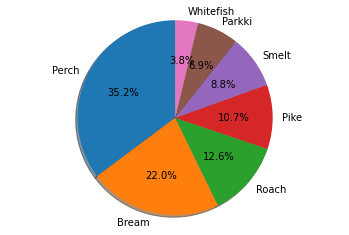

In [5]:
labels = "Perch" , "Bream" , "Roach" , "Pike" , "Smelt" , "Parkki" , "Whitefish"
sizes = [56,35,20,17,14,11,6]
explode = (0,0,0,0,0,0,0)
fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

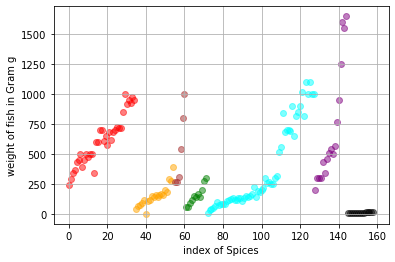

In [6]:
plt.scatter(data.index[data.Species == "Bream"] , data.Weight[data.Species == "Bream"],c="red" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Perch"] , data.Weight[data.Species == "Perch"],c="aqua" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Roach"] , data.Weight[data.Species == "Roach"],c="orange" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Pike"] , data.Weight[data.Species == "Pike"],c="purple" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Smelt"] , data.Weight[data.Species == "Smelt"],c="black" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Parkki"] , data.Weight[data.Species == "Parkki"],c="green" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Whitefish"] , data.Weight[data.Species == "Whitefish"],c="brown" , alpha = 0.5)
plt.xlabel("index of Spices")
plt.ylabel("weight of fish in Gram g")
plt.grid()

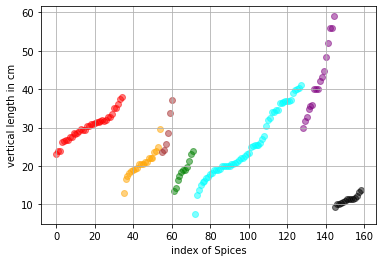

In [7]:
plt.scatter(data.index[data.Species == "Bream"] , data.Length1[data.Species == "Bream"],c="red" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Perch"] , data.Length1[data.Species == "Perch"],c="aqua" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Roach"] , data.Length1[data.Species == "Roach"],c="orange" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Pike"] , data.Length1[data.Species == "Pike"],c="purple" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Smelt"] , data.Length1[data.Species == "Smelt"],c="black" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Parkki"] , data.Length1[data.Species == "Parkki"],c="green" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Whitefish"] , data.Length1[data.Species == "Whitefish"],c="brown" , alpha = 0.5)
plt.xlabel("index of Spices")
plt.ylabel("vertical length in cm")
plt.grid()

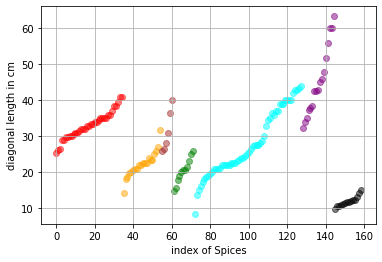

In [8]:
plt.scatter(data.index[data.Species == "Bream"] , data.Length2[data.Species == "Bream"],c="red" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Perch"] , data.Length2[data.Species == "Perch"],c="aqua" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Roach"] , data.Length2[data.Species == "Roach"],c="orange" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Pike"] , data.Length2[data.Species == "Pike"],c="purple" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Smelt"] , data.Length2[data.Species == "Smelt"],c="black" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Parkki"] , data.Length2[data.Species == "Parkki"],c="green" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Whitefish"] , data.Length2[data.Species == "Whitefish"],c="brown" , alpha = 0.5)
plt.xlabel("index of Spices")
plt.ylabel("diagonal length in cm")
plt.grid()

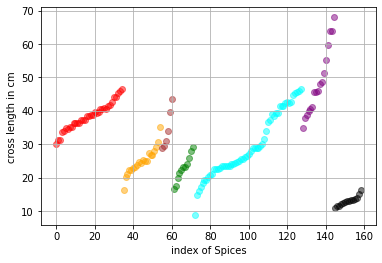

In [9]:
plt.scatter(data.index[data.Species == "Bream"] , data.Length3[data.Species == "Bream"],c="red" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Perch"] , data.Length3[data.Species == "Perch"],c="aqua" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Roach"] , data.Length3[data.Species == "Roach"],c="orange" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Pike"] , data.Length3[data.Species == "Pike"],c="purple" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Smelt"] , data.Length3[data.Species == "Smelt"],c="black" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Parkki"] , data.Length3[data.Species == "Parkki"],c="green" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Whitefish"] , data.Length3[data.Species == "Whitefish"],c="brown" , alpha = 0.5)
plt.xlabel("index of Spices")
plt.ylabel("cross length in cm")
plt.grid()

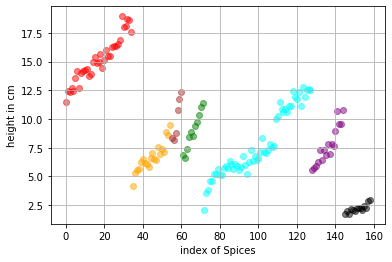

In [10]:
plt.scatter(data.index[data.Species == "Bream"] , data.Height[data.Species == "Bream"],c="red" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Perch"] , data.Height[data.Species == "Perch"],c="aqua" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Roach"] , data.Height[data.Species == "Roach"],c="orange" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Pike"] , data.Height[data.Species == "Pike"],c="purple" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Smelt"] , data.Height[data.Species == "Smelt"],c="black" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Parkki"] , data.Height[data.Species == "Parkki"],c="green" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Whitefish"] , data.Height[data.Species == "Whitefish"],c="brown" , alpha = 0.5)
plt.xlabel("index of Spices")
plt.ylabel("height in cm")
plt.grid()

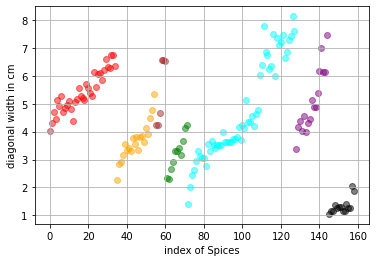

In [11]:
plt.scatter(data.index[data.Species == "Bream"] , data.Width[data.Species == "Bream"],c="red" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Perch"] , data.Width[data.Species == "Perch"],c="aqua" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Roach"] , data.Width[data.Species == "Roach"],c="orange" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Pike"] , data.Width[data.Species == "Pike"],c="purple" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Smelt"] , data.Width[data.Species == "Smelt"],c="black" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Parkki"] , data.Width[data.Species == "Parkki"],c="green" , alpha = 0.5)
plt.scatter(data.index[data.Species == "Whitefish"] , data.Width[data.Species == "Whitefish"],c="brown" , alpha = 0.5)
plt.xlabel("index of Spices")
plt.ylabel("diagonal width in cm")
plt.grid()

In [12]:
y = data.Species
x = data.drop(["Species"],axis = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

<a id = "3"></a>
<font color ='red'>
## 3. K-Nearest Neighbour (KNN) Classification

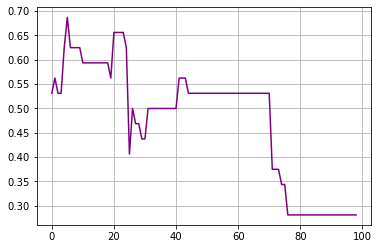

In [13]:
knn_score = 0.0
highest_indx = 1
from sklearn.neighbors import KNeighborsClassifier
score_list = []
for each in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))
    if (knn_score < knn.score(x_test,y_test) ):
        knn_score = knn.score(x_test,y_test)
        highest_indx = highest_indx+1
        
plt.plot(score_list,color = "purple" , alpha = 1 )    
plt.grid()         

In [14]:
print("KNN Max Accuracy : ",knn_score)

KNN Max Accuracy :  0.6875


<a id = "4"></a>
<font color ='red'>
## 4. Logistic Regression Classification

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_score = lr.score(x_test,y_test)
print("Logistic Regression Accuracy : ",lr_score)

Logistic Regression Accuracy :  0.875


<a id = "5"></a>
<font color ='red'>
## 5.Naive Bayes Classification

In [16]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
nb_score = naive_bayes.score(x_test,y_test)
print("Naive Bayes Accuracy : ",nb_score)

Naive Bayes Accuracy :  0.65625


<a id = "6"></a>
<font color ='red'>
## 6. Random Forest Classification

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)
rf_score = rfc.score(x_test,y_test)
print("Random Forest Accuracy : ",rf_score)

Random Forest Accuracy :  0.78125


<a id = "7"></a>
<font color ='red'>
## 7. Result

In [18]:
dict1 = {"Logistic Regression" : lr_score,"Random Forest" : rf_score,"K-Nearest Neighbour" : knn_score ,"Naive Bayes": nb_score ,"K-Nearest Neighbour" : knn_score }
dict1

{'Logistic Regression': 0.875,
 'Random Forest': 0.78125,
 'K-Nearest Neighbour': 0.6875,
 'Naive Bayes': 0.65625}